## <center>Практическая часть<a class="anchor" id="practice"></a><center>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = np.array([ [   1,    1,  500,    1],
               [   1,    1,  700,    1],
               [   1,    2,  750,    2],
               [   1,    5,  600,    1],
               [   1,    3, 1450,    2],
               [   1,    0,  800,    1],
               [   1,    5, 1500,    3],
               [   1,   10, 2000,    3],
               [   1,    1,  450,    1],
               [   1,    2, 1000,    2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [4]:
X

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 5.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [5]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [6]:
def standard_scale(x):
    res = (x - x.mean()) / x.std()
    return res

In [7]:
X_st = X.copy()
X_st[:, 2] = standard_scale(X[:, 2])

In [8]:
X_st

array([[ 1.        ,  1.        , -0.97958969,  1.        ],
       [ 1.        ,  1.        , -0.56713087,  1.        ],
       [ 1.        ,  2.        , -0.46401617,  2.        ],
       [ 1.        ,  5.        , -0.77336028,  1.        ],
       [ 1.        ,  3.        ,  0.97958969,  2.        ],
       [ 1.        ,  0.        , -0.36090146,  1.        ],
       [ 1.        ,  5.        ,  1.08270439,  3.        ],
       [ 1.        , 10.        ,  2.11385144,  3.        ],
       [ 1.        ,  1.        , -1.08270439,  1.        ],
       [ 1.        ,  2.        ,  0.05155735,  2.        ]])

In [9]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [10]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.8, 0.1])
calc_logloss(y1, y_pred1)

0.164252033486018

In [11]:
# Плохой пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([1, 0.1])
calc_logloss(y1, y_pred1)

C:\Users\Magad\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\Magad\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


nan

In [12]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [13]:
z = np.linspace(-10, 10, 101)

In [14]:
probabilities = sigmoid(z)

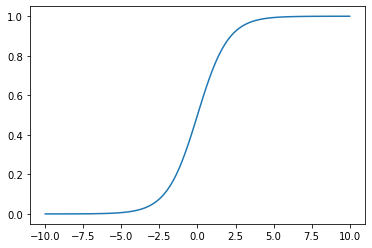

In [15]:
plt.plot(z, probabilities)
plt.show()

Logistic Regression

In [16]:
def eval_model_print(X, y, iterations, eta=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(iterations):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        
        dQ = 1/n * X.T @ (y_pred - y)
        W -= eta * dQ
        if i % (iterations / 10) == 0:
            print(i, W, err)
    
    print(iterations, W, err)
    
    return W

In [106]:
W = eval_model_print(X_st, y, iterations=500, eta=1e-4)

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
50 [ 0.494784   -0.14564801  0.6475462   1.52014828] 1.1657985749255426
100 [ 0.49290109 -0.15285535  0.64740132  1.51733474] 1.1531112685708473
150 [ 0.49102761 -0.16003088  0.64725118  1.51453281] 1.1405352753305018
200 [ 0.48916364 -0.16717404  0.64709581  1.51174267] 1.1280719326917483
250 [ 0.48730929 -0.17428428  0.64693524  1.50896452] 1.1157225565960736
300 [ 0.48546465 -0.18136107  0.64676951  1.50619853] 1.103488442622439
350 [ 0.48362982 -0.18840385  0.64659868  1.5034449 ] 1.0913708674192037
400 [ 0.48180488 -0.19541206  0.64642281  1.50070383] 1.0793710903721336
450 [ 0.47998993 -0.20238516  0.64624195  1.49797551] 1.0674903554915993
500 [ 0.47822106 -0.20918419  0.64605995  1.49531432] 1.0559639161585663


## Домашнее задание <a class='anchor' id='hw'>

1. *Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [125]:
def calc_logloss(y, y_pred):
    y_pred = np.where(y_pred == 0, y_pred + 1e-5, y_pred)
    y_pred = np.where(y_pred == 1, y_pred - 1e-5, y_pred)
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return y_pred, err

In [102]:
# пример применения
y2 = np.array([1, 0, 0])
y_pred2 = np.array([1, 0, 0])
calc_logloss(y2, y_pred2)

(array([9.9999e-01, 1.0000e-05, 1.0000e-05]), 1.0000050000287824e-05)

2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [126]:
def eval_model(X, y, iterations, eta=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(iterations):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        y_pred, err = calc_logloss(y, y_pred)
        
        dQ = 1/n * X.T @ (y_pred - y)
        W -= eta * dQ

    return W, err

step = 0 iter = 10000 , eta = 0.0001 , err = 0.5201522304551885
step = 1 iter = 10000 , eta = 0.0008071428571428573 , err = 0.4812662460315983
step = 2 iter = 10000 , eta = 0.0015142857142857145 , err = 0.46574317287414235
step = 3 iter = 10000 , eta = 0.0022214285714285717 , err = 0.453585284190417
step = 4 iter = 10000 , eta = 0.002928571428571429 , err = 0.4431728249360395
step = 5 iter = 10000 , eta = 0.003635714285714286 , err = 0.4338960399142403
step = 6 iter = 10000 , eta = 0.004342857142857144 , err = 0.4254448518387792
step = 7 iter = 10000 , eta = 0.005050000000000001 , err = 0.4176452018708739
step = 8 iter = 10000 , eta = 0.005757142857142858 , err = 0.4103906994016091
step = 9 iter = 10000 , eta = 0.006464285714285716 , err = 0.40361057170815895
step = 10 iter = 10000 , eta = 0.0071714285714285725 , err = 0.3972537278153102
step = 11 iter = 10000 , eta = 0.00787857142857143 , err = 0.3912805057870223
step = 12 iter = 10000 , eta = 0.008585714285714287 , err = 0.3856582678

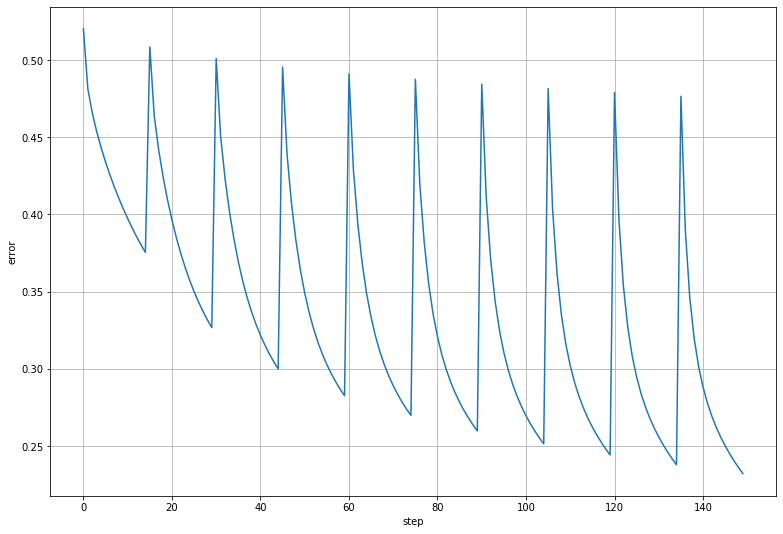

In [129]:
%%time
# Итерации
n_iterations_list = np.linspace(10000, 100000, 10).astype('int')
# Шаги
etas = np.linspace(0.0001, 0.01, 15)

# потери будем записывать в список для отображения в виде графика
errors = []
step = 0

for n_iterations in n_iterations_list:
    for eta in etas:
        w, err = eval_model(X_st, y, n_iterations, eta)
        
        step += 1
        errors.append(err)

plt.figure(figsize=(13, 9))
plt.xlabel('step')
plt.ylabel('error')
plt.grid()
plt.plot(range(step), errors);

for i in range(step):
    i_iter = i // len(etas)
    i_eta = i - i_iter * len(etas)
    print('step =', i, 'iter =', n_iterations_list[i_iter], ', eta =',  etas[i_eta], ', err =', errors[i])
    
print('Min error:', min(errors), ', step:', errors.index(min(errors)))

Чувствуется эффект переобучения при eta > 0.01, веса становятся очень большими.
Опытным путем подобрал, что количество итераций может стремиться до бесконечности, а eta = 0.01

In [232]:
eval_model_print(X_st, y, iterations=100000, eta=0.01)

0 [ 0.49292028 -0.15277306  0.64741473  1.51736839] (array([0.77678197, 0.81967624, 0.95100063, 0.69583154, 0.97730047,
       0.85643521, 0.9937923 , 0.99364588, 0.76498816, 0.9644164 ]), 1.1785958344356262)
10000 [-2.51859539 -0.94526548  0.40020792  3.13260413] (array([0.32666824, 0.36396633, 0.84161528, 0.01187011, 0.78632165,
       0.61529466, 0.92996279, 0.15091587, 0.31765515, 0.8672287 ]), 0.37535104091786076)
20000 [-4.27636089 -0.98163197 -0.27404823  4.26190358] (array([0.32571389, 0.30139871, 0.91768332, 0.00891866, 0.73771242,
       0.5211064 , 0.96457978, 0.13167205, 0.33194918, 0.90636304]), 0.3266452802377501)
30000 [-5.56029067 -1.03174275 -0.73817187  5.15128174] (array([0.32791126, 0.26461923, 0.95352517, 0.00671401, 0.71584535,
       0.46441437, 0.98083953, 0.12086646, 0.34489962, 0.93343506]), 0.29992941321768546)
40000 [-6.58505076 -1.08569439 -1.09081936  5.8979985 ] (array([0.33088331, 0.23974141, 0.97195955, 0.00510762, 0.70792126,
       0.42718117, 0.98900

array([-10.74417094,  -1.38394305,  -2.42070613,   9.13379901])

3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [132]:
def calc_pred_proba(W, X):
    return np.squeeze(sigmoid(np.dot(X, W)))

In [135]:
W, err = eval_model(X_st, y, iterations=100000, eta=0.01)

In [136]:
W

array([-10.74417094,  -1.38394305,  -2.42070613,   9.13379901])

In [142]:
y_pred_proba = calc_pred_proba(W, X_st)
y_pred_proba

array([0.34909577, 0.16500392, 0.99720963, 0.00128205, 0.73111739,
       0.3237184 , 0.99918914, 0.09118778, 0.40771831, 0.99034651])

In [140]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [141]:
import pandas as pd

In [148]:
d = {'y': y.astype('int'), 'y_pred_proba': y_pred_proba}
pd.DataFrame(data=d)

,y,y_pred_proba
0,0,0.349096
1,0,0.165004
2,1,0.997210
3,0,0.001282
4,1,0.731117
5,0,0.323718
6,1,0.999189
7,0,0.091188
8,1,0.407718
9,1,0.990347


4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [145]:
def calc_pred(w, X):
    
    m = X.shape[0]
    
    y_pred = np.zeros(m)

    A = calc_pred_proba(w, X)

    # За порог отнесения к тому или иному классу примем вероятность 0.5
    for i in range(A.shape[0]):
        if (A[i] > 0.5): 
            y_pred[i] = 1
        elif (A[i] <= 0.5):
            y_pred[i] = 0

    return y_pred

In [150]:
y_pred = calc_pred(W, X_st)
y_pred

array([0., 0., 1., 0., 1., 0., 1., 0., 0., 1.])

In [153]:
pd.DataFrame({'y': y.astype('int'), 'y_pred_proba': y_pred_proba, 'y_pred': y_pred.astype('int')})

,y,y_pred_proba,y_pred
0,0,0.349096,0
1,0,0.165004,0
2,1,0.997210,1
3,0,0.001282,0
4,1,0.731117,1
5,0,0.323718,0
6,1,0.999189,1
7,0,0.091188,0
8,1,0.407718,0
9,1,0.990347,1


5. *Реализуйте функции для подсчета Accuracy, матрицы ошибок, точности и полноты, а также F1 score.

$$accuracy(a,x) = \frac{1}{l} \sum^{l}_{i=1}[a(x_{i})=y_{i}].$$

$$precision(a, X) = \frac{TP}{TP+FP}.$$

$$recall(a, X) = \frac{TP}{TP+FN},$$

$$F1 = \frac{2 \cdot precision \cdot recall }{ presision + recall}.$$

In [221]:
pd.DataFrame({'y_pred': y_pred.astype('int'), 'y': y.astype('int')})

,y_pred,y
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1
5,0,0
6,1,1
7,0,0
8,0,1
9,1,1


In [223]:
TP = len(y_pred[(y_pred == 1)&(y_pred == y)])
FP = len(y_pred[(y_pred == 1)&(y_pred != y)])
FN = len(y_pred[(y_pred == 0)&(y_pred != y)])
TN = len(y_pred[(y_pred == 0)&(y_pred == y)])

print('Матрица ошибок:')
np.array([[TP, FP],
          [FN, TN]])

Матрица ошибок:


array([[4, 0],
       [1, 5]])

In [169]:
def accuracy(w, X, y):
    
    y_pred = calc_pred(w, X)
    
    return len(y_pred[y_pred == y])/len(y_pred)

In [171]:
accuracy(W, X_st, y)

0.9

In [213]:
def precision(w, X, y):
    
    y_pred = calc_pred(w, X)
    TP = len(y_pred[(y_pred == 1)&(y_pred == y)])
    FP = len(y_pred[(y_pred == 1)&(y_pred != y)])
    
    return TP/(TP+FP)

In [214]:
precision(W, X_st, y)

1.0

In [224]:
def recall(w, X, y):
    
    y_pred = calc_pred(w, X)
    TP = len(y_pred[(y_pred == 1)&(y_pred == y)])
    FN = len(y_pred[(y_pred == 0)&(y_pred != y)])
    
    return TP/(TP+FN)

In [225]:
recall(W, X_st, y)

0.8

In [229]:
def f1_score(w, X, y):
    
    return 2*precision(w, X, y)*recall(w, X, y)/(precision(w, X, y)+recall(w, X, y))    

In [230]:
f1_score(W, X_st, y)

0.888888888888889

6. Могла ли модель переобучиться? Почему?

По моему наблюдению единственный критерий, по которому можно понять переобучилась модель или нет, это повышение весов W при eta > 0.01

In [239]:
eval_model_print(X_st, y, iterations=100000, eta=0.1)

0 [ 0.45877546 -0.2833519   0.6449505   1.46641523] (array([0.77678197, 0.81967624, 0.95100063, 0.69583154, 0.97730047,
       0.85643521, 0.9937923 , 0.99364588, 0.76498816, 0.9644164 ]), 1.1785958344356262)
10000 [-10.74518967  -1.38402525  -2.42101957   9.13461388] (array([0.34909794, 0.16499718, 0.99721038, 0.00128184, 0.73112245,
       0.32370941, 0.99918939, 0.0911856 , 0.40772414, 0.99034837]), 0.2321387488434184)
20000 [-15.42754617  -1.78141273  -3.82881206  12.91762302] (array([3.68030169e-01, 1.07181954e-01, 9.99819801e-01, 2.12623304e-04,
       7.87975945e-01, 2.44518098e-01, 9.99965431e-01, 7.02850600e-02,
       4.63593993e-01, 9.98704156e-01]), 0.193432076158086)
30000 [-19.03214673  -2.10018205  -4.88462075  15.84722845] (array([3.77498615e-01, 7.48240215e-02, 9.99978085e-01, 4.97662151e-05,
       8.28753104e-01, 1.94344341e-01, 9.99997009e-01, 5.63792746e-02,
       5.00871889e-01, 9.99728144e-01]), 0.1705495036750297)
40000 [-21.99898567  -2.36617547  -5.74184132  

array([-33.59359124,  -3.41351803,  -9.03359875,  27.65528749])

В данном случае заметил эффект переобучния, так как 1 и 4 веса повысились

Хотелось бы еще понять как в таких случаях определять переобучение. Ведь можно и уменьшить количество итераций со 100000 до 10000 при eta = 0.1 и получим нормальные значения весов W

In [240]:
eval_model_print(X_st, y, iterations=10000, eta=0.1)

0 [ 0.45877546 -0.2833519   0.6449505   1.46641523] (array([0.77678197, 0.81967624, 0.95100063, 0.69583154, 0.97730047,
       0.85643521, 0.9937923 , 0.99364588, 0.76498816, 0.9644164 ]), 1.1785958344356262)
1000 [-2.52102182 -0.94535892  0.39937552  3.13420485] (array([0.32665172, 0.36393965, 0.84164558, 0.01186598, 0.78632545,
       0.61527784, 0.92998239, 0.1509004 , 0.31764105, 0.8672491 ]), 0.37533367618380076)
2000 [-4.27828712 -0.98168834 -0.27476935  4.26319069] (array([0.32571495, 0.30137989, 0.91770376, 0.00891773, 0.73769792,
       0.52107628, 0.96458898, 0.13166687, 0.33195546, 0.90637602]), 0.32663122009930967)
3000 [-5.56189789 -1.0318158  -0.73874052  5.15242458] (array([0.32791315, 0.26460394, 0.95353806, 0.00671311, 0.71583736,
       0.46439025, 0.98084526, 0.12086235, 0.34490648, 0.93344637]), 0.29991853172016747)
4000 [-6.58645538 -1.0857742  -1.0912958   5.89903883] (array([0.33088548, 0.23972873, 0.97196759, 0.00510684, 0.70791839,
       0.42716205, 0.98900984

array([-10.744631  ,  -1.38398009,  -2.42084781,   9.13416686])

Если я правильно понял, то последний вариант считается нормальным обучением. Только в этом случае функция ошибки показывает слабый минимум нежели при обучении за 100000 итераций со скоростью eta = 0.01